# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 551


In [3]:
weather_api_key = "3233aaa358a897fdc11c55f1585c455a" 

---

In [4]:
print(weather_api_key)

3233aaa358a897fdc11c55f1585c455a


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response["weather"]
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]
        city_wind = response["wind"]
        city_country =response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as error:
        print("City not found. Skipping...")
        pass
        
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | postmasburg
City not found. Skipping...
Processing Record 2 of Set 1 | sechelt
Processing Record 3 of Set 1 | gizo
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | portland
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | tocopilla
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | happy valley-goose bay
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | severo-yeniseyskiy
Processing Record 17 of Set 1 | cannonvale
Processing Record 18 of Set 1 | vredendal
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set

Processing Record 39 of Set 4 | pangody
Processing Record 40 of Set 4 | shetpe
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | coeur d'alene
Processing Record 43 of Set 4 | jeddah
Processing Record 44 of Set 4 | bartica
Processing Record 45 of Set 4 | vernon
Processing Record 46 of Set 4 | al burayqah
Processing Record 47 of Set 4 | anadyr
Processing Record 48 of Set 4 | thunder bay
Processing Record 49 of Set 4 | fale old settlement
Processing Record 0 of Set 5 | kolonia
Processing Record 1 of Set 5 | swakopmund
Processing Record 2 of Set 5 | bilibino
Processing Record 3 of Set 5 | haci zeynalabdin
Processing Record 4 of Set 5 | berriane
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | glace bay
Processing Record 7 of Set 5 | santiago papasquiaro
City not found. Skipping...
Processing Record 8 of Set 5 | malanje
Processing Record 9 of Set 5 | gwanda
Processing Record 10 of Set 5 | hilo
Processing Record 11 of Set 5 | fort st. john
Proce

Processing Record 30 of Set 8 | jashpurnagar
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | hermiston
Processing Record 33 of Set 8 | micheweni
Processing Record 34 of Set 8 | belmonte
Processing Record 35 of Set 8 | singa
Processing Record 36 of Set 8 | estevan
Processing Record 37 of Set 8 | san mariano
Processing Record 38 of Set 8 | mukalla
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | mokhsogollokh
Processing Record 41 of Set 8 | nantucket
Processing Record 42 of Set 8 | mahishadal
Processing Record 43 of Set 8 | changping
Processing Record 44 of Set 8 | tobelo
Processing Record 45 of Set 8 | aljezur
Processing Record 46 of Set 8 | boryeong
Processing Record 47 of Set 8 | hutchinson
Processing Record 48 of Set 8 | zaysan
Processing Record 49 of Set 8 | aral
Processing Record 0 of Set 9 | cairns city
City not found. Skipping...
Processing Record 1 of Set 9 | anna regina
Processing Record 2 of Set 9 | amarante do maranhao

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          522
Lat           522
Lng           522
Max Temp      522
Humidity      522
Cloudiness    522
Wind Speed    522
Country       522
Date          522
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sechelt,49.4664,-123.7694,287.77,81,{'all': 62},"{'speed': 2.73, 'deg': 272, 'gust': 2.63}",CA,1696354535
1,gizo,-8.1030,156.8419,299.15,89,{'all': 100},"{'speed': 2.43, 'deg': 87, 'gust': 3.58}",SB,1696354535
2,puerto natales,-51.7236,-72.4875,286.40,50,{'all': 40},"{'speed': 9.26, 'deg': 290}",CL,1696354194
3,portland,45.5234,-122.6762,290.16,95,{'all': 100},"{'speed': 4.12, 'deg': 310}",US,1696354245
4,puerto ayora,-0.7393,-90.3518,303.13,90,{'all': 62},"{'speed': 2.24, 'deg': 177, 'gust': 4.02}",EC,1696354221


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sechelt,49.4664,-123.7694,287.77,81,{'all': 62},"{'speed': 2.73, 'deg': 272, 'gust': 2.63}",CA,1696354535
1,gizo,-8.1030,156.8419,299.15,89,{'all': 100},"{'speed': 2.43, 'deg': 87, 'gust': 3.58}",SB,1696354535
2,puerto natales,-51.7236,-72.4875,286.40,50,{'all': 40},"{'speed': 9.26, 'deg': 290}",CL,1696354194
3,portland,45.5234,-122.6762,290.16,95,{'all': 100},"{'speed': 4.12, 'deg': 310}",US,1696354245
4,puerto ayora,-0.7393,-90.3518,303.13,90,{'all': 62},"{'speed': 2.24, 'deg': 177, 'gust': 4.02}",EC,1696354221


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

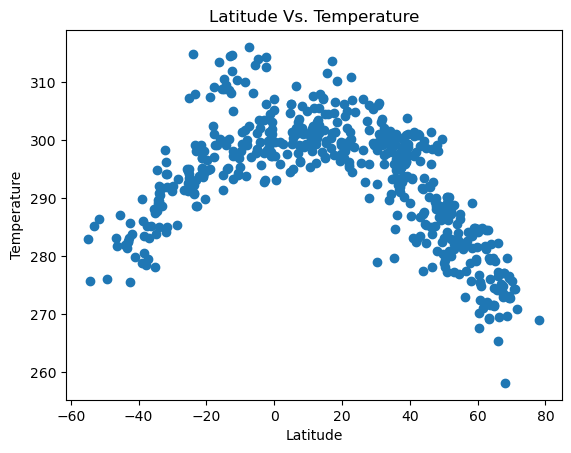

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude Vs. Cloudiness

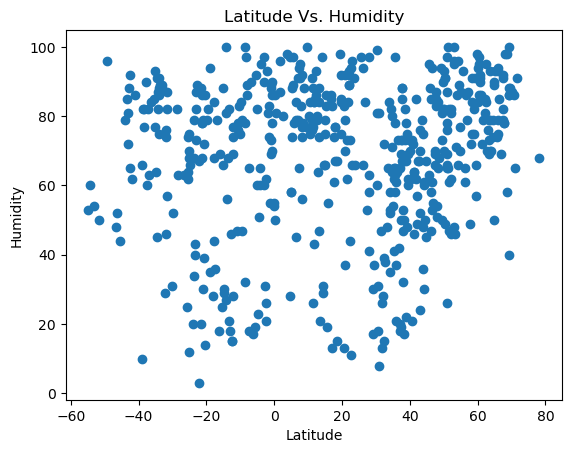

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs. Humidity")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

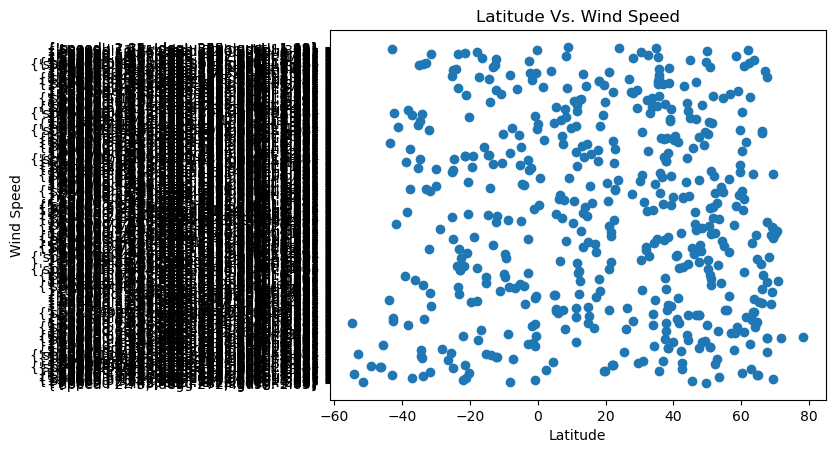

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lin_reg_plot(dataFrame, xcolumn, ycolumn):
    x=dataFrame[xcolumn]
    y=dataFrame[ycolumn]
    plt.scatter(x,y)
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)
    reg = linregress(x,y)
    plt.plot(x, reg.slope*x+reg.intercept, 'r')
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sechelt,49.4664,-123.7694,287.77,81,{'all': 62},"{'speed': 2.73, 'deg': 272, 'gust': 2.63}",CA,1696354535
3,portland,45.5234,-122.6762,290.16,95,{'all': 100},"{'speed': 4.12, 'deg': 310}",US,1696354245
6,talnakh,69.4865,88.3972,272.71,88,{'all': 100},"{'speed': 8.96, 'deg': 277, 'gust': 13.57}",RU,1696354238
9,happy valley-goose bay,53.3168,-60.3315,282.32,46,{'all': 75},"{'speed': 7.2, 'deg': 320}",CA,1696354257
11,badger,64.8000,-147.5333,271.47,90,{'all': 100},"{'speed': 2.57, 'deg': 60}",US,1696354211


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gizo,-8.1030,156.8419,299.15,89,{'all': 100},"{'speed': 2.43, 'deg': 87, 'gust': 3.58}",SB,1696354535
2,puerto natales,-51.7236,-72.4875,286.40,50,{'all': 40},"{'speed': 9.26, 'deg': 290}",CL,1696354194
4,puerto ayora,-0.7393,-90.3518,303.13,90,{'all': 62},"{'speed': 2.24, 'deg': 177, 'gust': 4.02}",EC,1696354221
5,tocopilla,-22.0920,-70.1979,293.73,67,{'all': 10},"{'speed': 6.7, 'deg': 214, 'gust': 6.78}",CL,1696354536
7,edinburgh of the seven seas,-37.0676,-12.3116,283.17,63,{'all': 58},"{'speed': 7.61, 'deg': 145, 'gust': 7.64}",SH,1696354201


###  Temperature vs. Latitude Linear Regression Plot

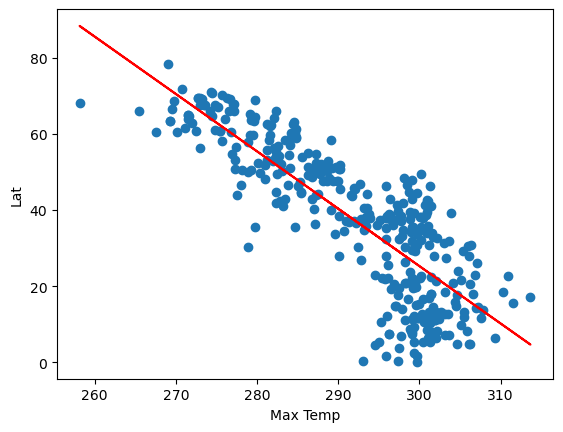

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
lin_reg_plot(northern_hemi_df,"Max Temp", "Lat")

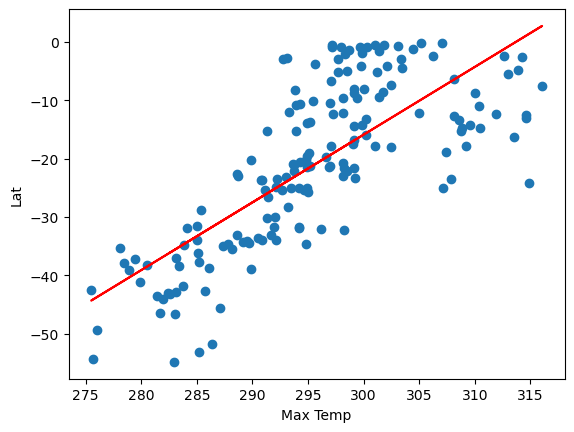

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
lin_reg_plot(southern_hemi_df,"Max Temp", "Lat")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

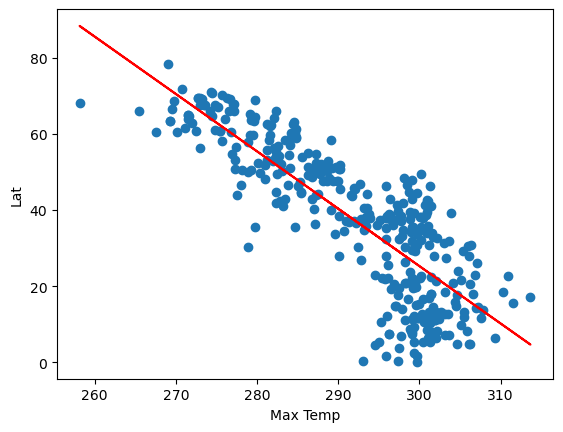

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
lin_reg_plot(northern_hemi_df,"Max Temp", "Lat")

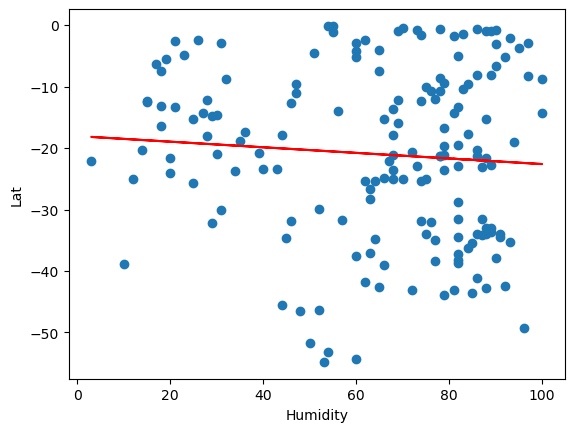

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
lin_reg_plot(southern_hemi_df,"Humidity", "Lat")

In [21]:
northern_hemi_df=northern_hemi_df.reset_index()
northern_hemi_df.to_csv("output_data/north.csv")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

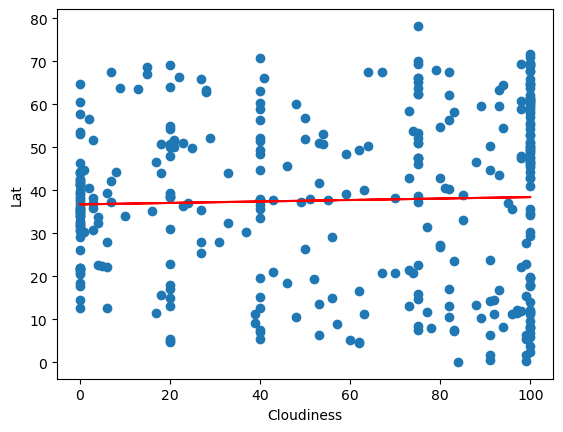

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
values=[]
for i in range(len(northern_hemi_df["Cloudiness"])):
    try:
        value=northern_hemi_df["Cloudiness"][i].replace("}","")
        value =value.replace("{'all': ","")
        values.append(float(value))
    except Exception as error:
        pass
    
northern_hemi_df["Cloudiness"]=values
lin_reg_plot(northern_hemi_df,"Cloudiness", "Lat")

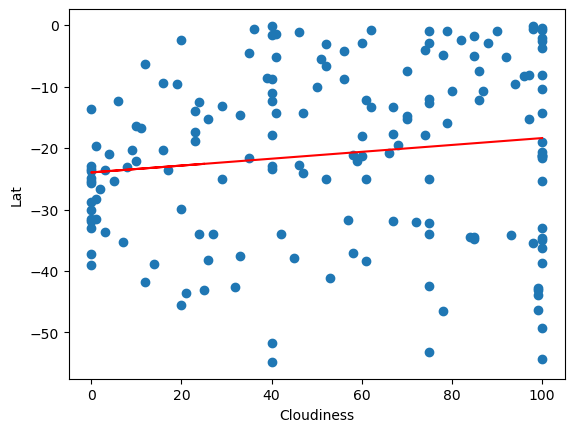

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
values=[]
southern_hemi_df=southern_hemi_df.reset_index()
for i in range(len(southern_hemi_df["Cloudiness"])):
    try:
        value=southern_hemi_df["Cloudiness"][i].replace("}","")
        value =value.replace("{'all': ","")
        values.append(float(value))
    except Exception as error:
        pass
    
southern_hemi_df["Cloudiness"]=values
lin_reg_plot(southern_hemi_df,"Cloudiness", "Lat")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

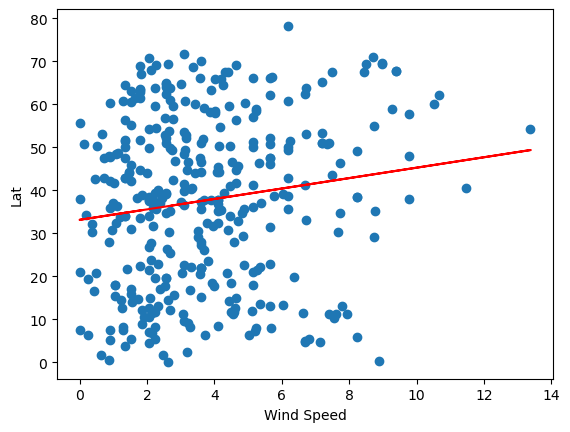

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
speeds=[]
for i in range(len(northern_hemi_df["Wind Speed"])):
    try:
        speed =northern_hemi_df["Wind Speed"][i].replace("{'speed': ","")
        
        speed=speed[0:speed.index(",")]
        
        speeds.append(float(speed))
    except:
        pass

northern_hemi_df["Wind Speed"]=speeds



lin_reg_plot(northern_hemi_df, "Wind Speed", "Lat")

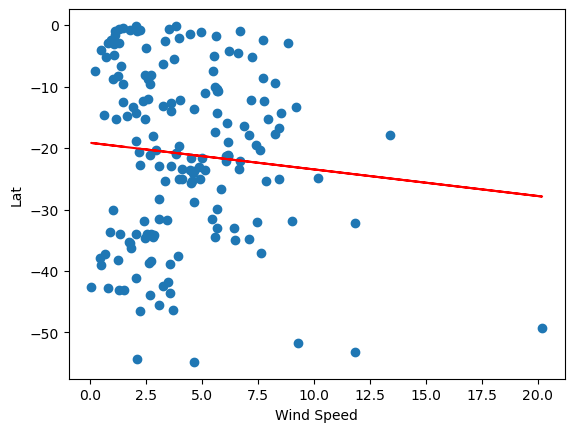

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
speeds=[]
for i in range(len(southern_hemi_df["Wind Speed"])):
    try:
        speed =southern_hemi_df["Wind Speed"][i].replace("{'speed': ","")
        speed=speed[0:speed.index(",")]
        speeds.append(float(speed))
    except:
        pass

southern_hemi_df["Wind Speed"]=speeds



lin_reg_plot(southern_hemi_df, "Wind Speed", "Lat")

**Discussion about the linear relationship:** YOUR RESPONSE HERE